## Problem statement

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Second-Phase-Practice-Projects--2-\Titanic Project\Titanic Project Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Columns

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- PassengerId - sl.no of the dataset, Not required
- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name of passenger
- Sex - male or female
- Age - Passenger Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [4]:
# droping unwanted column

df.drop(columns='PassengerId',inplace=True)

# droping duplicates if any
df.drop_duplicates(inplace=True)


In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Analysing Basic Metrics

In [6]:
# we can observe that there are no duplicates
df.shape

(891, 11)

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

### Findings

- we can observe that thre are missing values in Age,Cabin And Embarked columns
- we can observe 
    1. Continous data
        - Age
        - Fare
    2. Catagorical data 
        - Survived
        - Pclass
        - Name
        - Sex
        - SibSp
        - Parch
        - Ticket
        - Cabin
        - Embarked
        

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Findings

- we can observe that in  fare column,age column,SibSp column,and Parch column there is huge difference between 3rd quartile and max value which indicates the presence of outliers

- in both age and fare columns there is difference between mean and median which indicates presence of skeweness (i.e not normally distributed)

### Encoading object type data

- since there are high number of unique values one-hot-encoader and pd.get dummies will create too many rows so we will go with lable encoader 

- then we must replace encoaded nan values with np.nan

In [11]:
mask = df.isna()

In [12]:
# step 1 encoading using label encoader
from sklearn.preprocessing import LabelEncoder
lben = LabelEncoder()
df['Name']=lben.fit_transform(df['Name'])
df['Sex']=lben.fit_transform(df['Sex'])
df['Ticket']=lben.fit_transform(df['Ticket'])
df['Cabin']=lben.fit_transform(df['Cabin'])
df['Embarked']=lben.fit_transform(df['Embarked'])


# step 2 replacing encoaded nan values with original nan values using mask function
df.mask(mask==True,np.nan,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,NaN,2.0
1,1,1,190,0,38.0,1,0,596,71.2833,81.0,0.0
2,1,3,353,0,26.0,0,0,669,7.9250,NaN,2.0
3,1,1,272,0,35.0,1,0,49,53.1000,55.0,2.0
4,0,3,15,1,35.0,0,0,472,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,101,13.0000,NaN,2.0
887,1,1,303,0,19.0,0,0,14,30.0000,30.0,2.0
888,0,3,413,0,NaN,1,2,675,23.4500,NaN,2.0
889,1,1,81,1,26.0,0,0,8,30.0000,60.0,0.0


### Missing value treatment

- since there are many null values in cabin column we cannot remove them row wise, it is better to remove that column

In [13]:
# deleting cabin column
df.drop(columns='Cabin',inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,2.0
1,1,1,190,0,38.0,1,0,596,71.2833,0.0
2,1,3,353,0,26.0,0,0,669,7.9250,2.0
3,1,1,272,0,35.0,1,0,49,53.1000,2.0
4,0,3,15,1,35.0,0,0,472,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,101,13.0000,2.0
887,1,1,303,0,19.0,0,0,14,30.0000,2.0
888,0,3,413,0,NaN,1,2,675,23.4500,2.0
889,1,1,81,1,26.0,0,0,8,30.0000,0.0


In [14]:
# using knn inputer for filling null values
from sklearn.impute import KNNImputer
kimp = KNNImputer(n_neighbors=5)
df1=pd.DataFrame(kimp.fit_transform(X=df),columns=[ 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Embarked'])
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,548.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,1.0,303.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,0.0,3.0,413.0,0.0,23.6,1.0,2.0,675.0,23.4500,2.0
889,1.0,1.0,81.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


### graphical univariate analysis

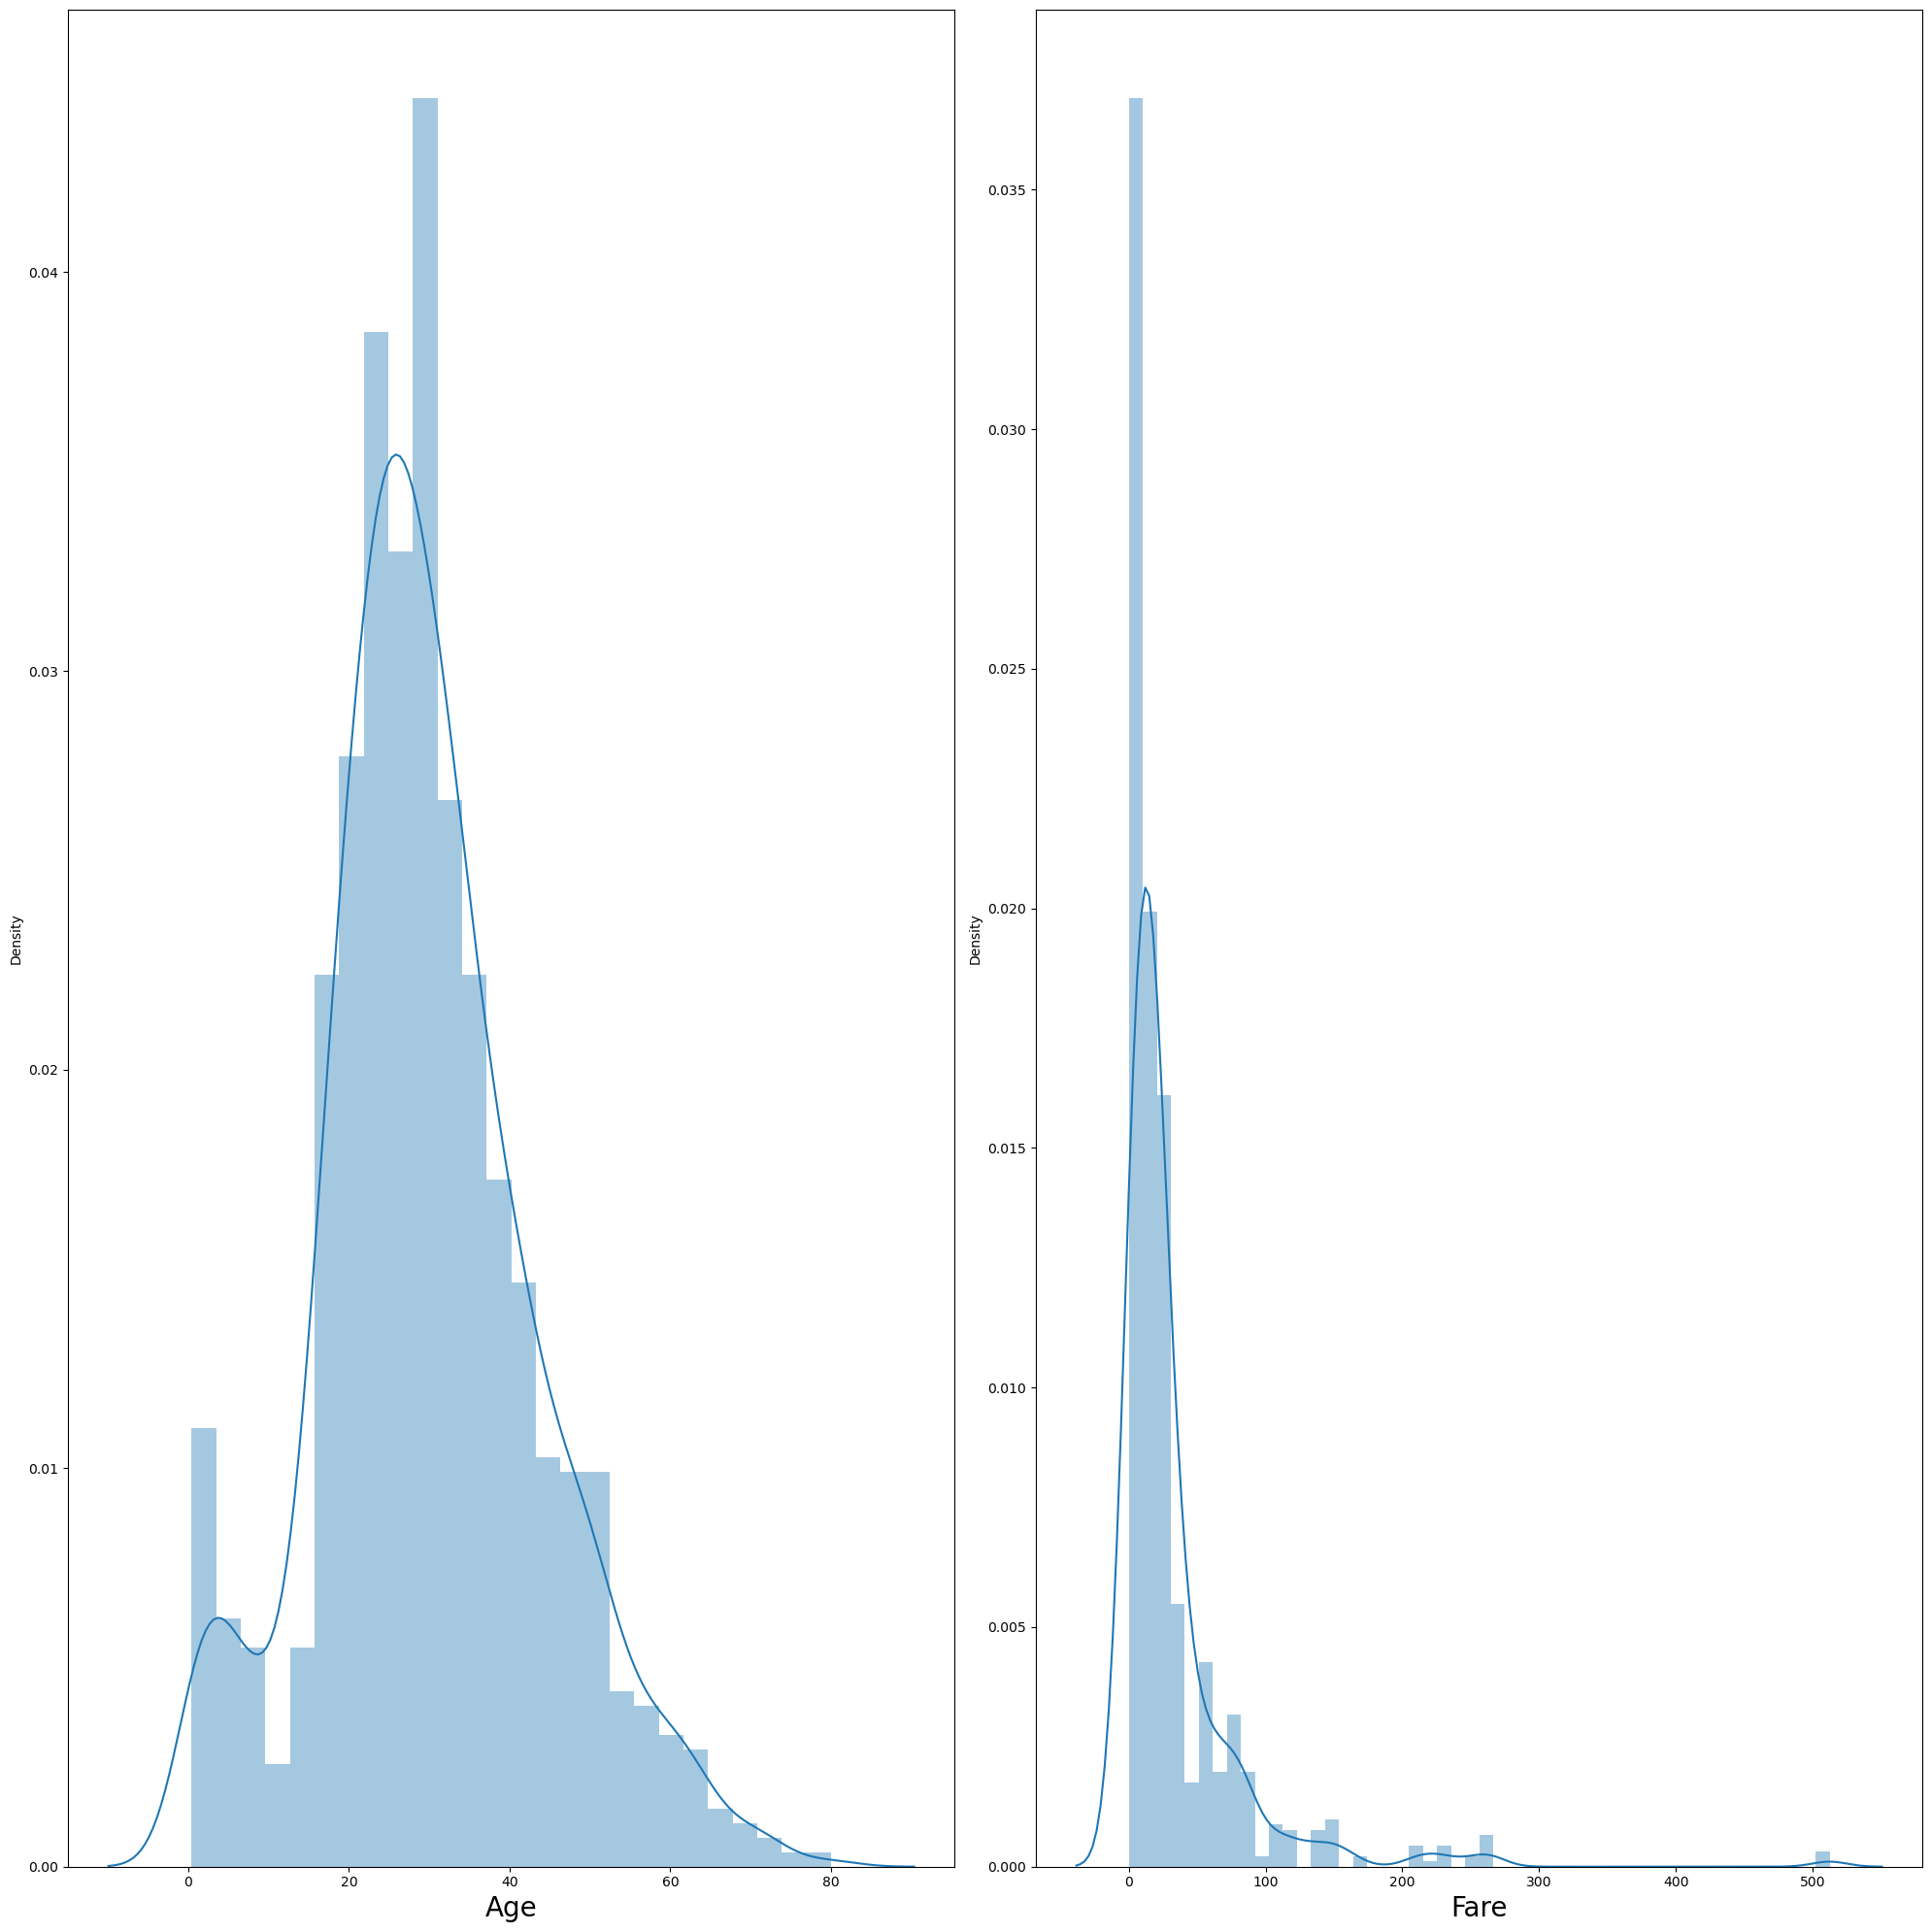

In [15]:
# dist plot for continous data
plt.figure(figsize=(20,20))

    
sns.distplot(df1['Age'],ax=plt.subplot(1,2,1))
plt.xlabel('Age',fontsize = 20)
sns.distplot(df1['Fare'],ax=plt.subplot(1,2,2))
plt.xlabel('Fare',fontsize = 20)
    
plt.tight_layout()  

- age seems normally distributed 
- Fare seems positively skewed(right skewed) and also there may be presence of outliers

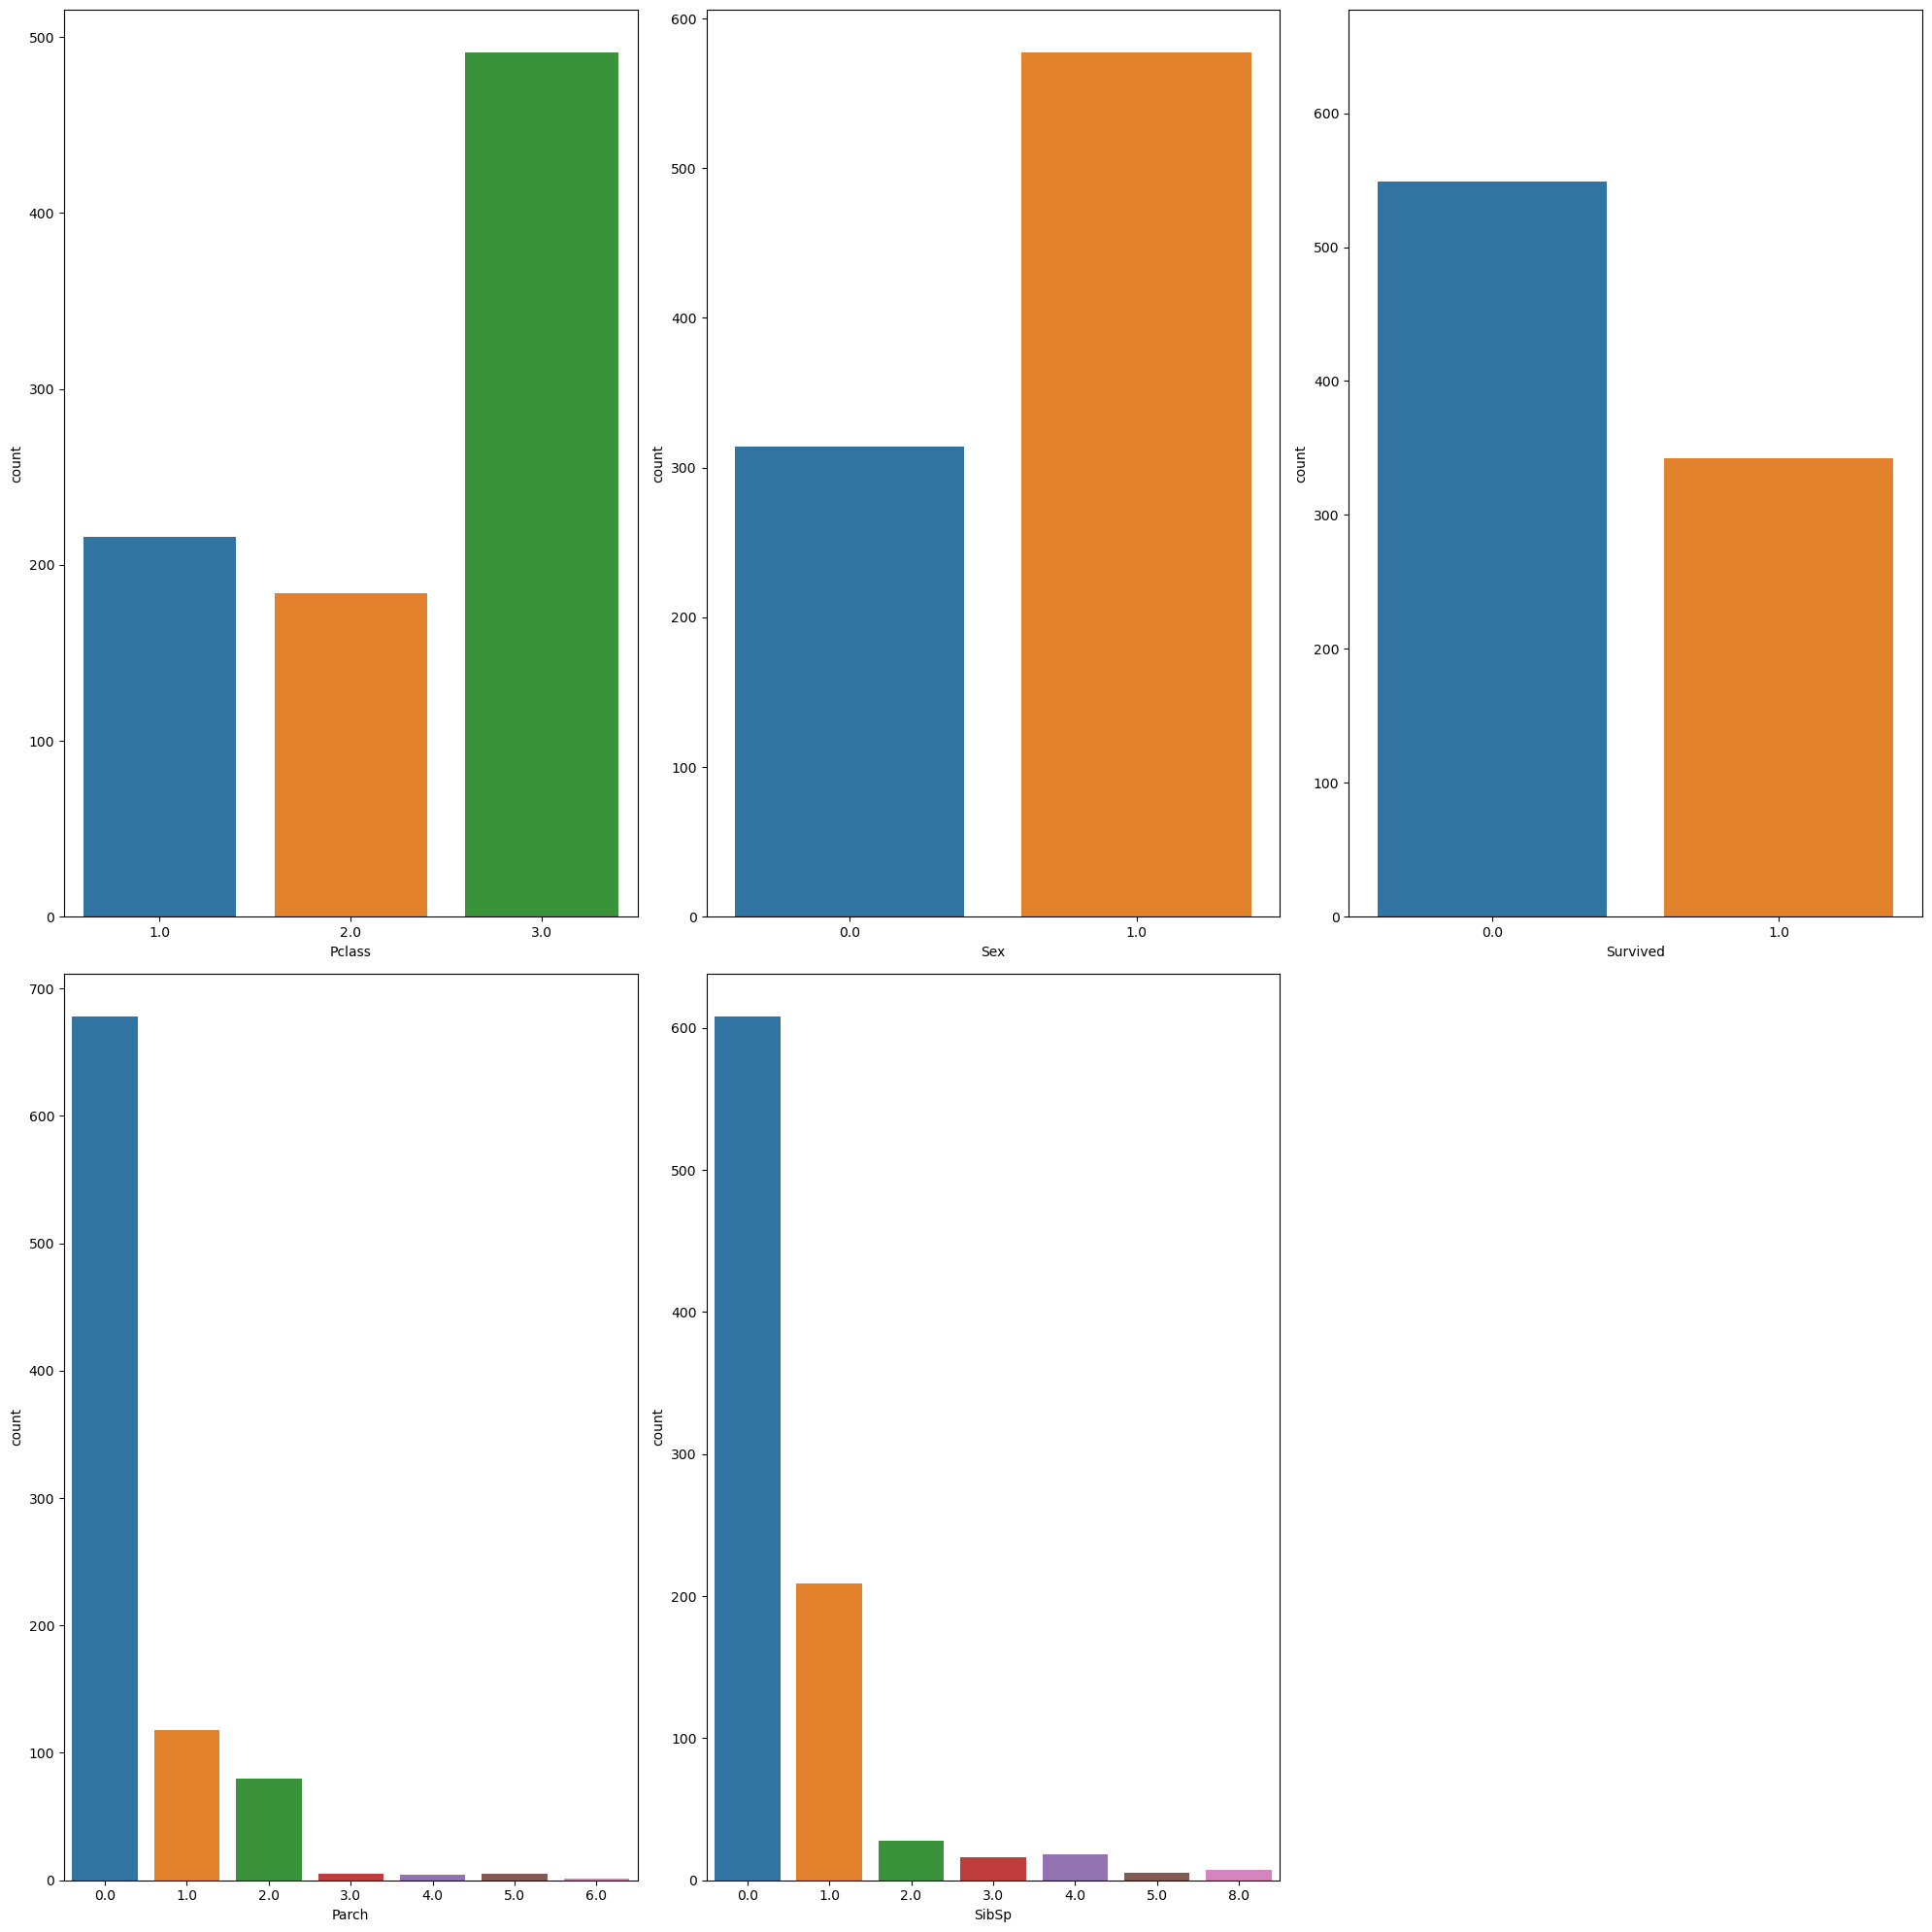

In [16]:
plt.figure(figsize=(20,20))

sns.countplot(df1,x='Pclass',ax=plt.subplot(2,3,1))
sns.countplot(df1,x='Sex',ax=plt.subplot(2,3,2))
sns.countplot(df1,x='SibSp',ax=plt.subplot(2,3,5))
sns.countplot(df1,x='Parch',ax=plt.subplot(2,3,4))
sns.countplot(df1,x='Embarked',ax=plt.subplot(2,3,3))
sns.countplot(df1,x='Survived',ax=plt.subplot(2,3,3))
plt.tight_layout()

- there are more number of  3rd class passenger then total number of passengers in other classes 
- there are alomost 80% more male passengers then female passengers
- majority number of passengers embarked at Southampton
- majority of passengers have no Siblings/Spouses Aboard
- majority of passengers have no Siblings/Spouses Aboard Parents/Children Aboard

In [17]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,548.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,1.0,303.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,0.0,3.0,413.0,0.0,23.6,1.0,2.0,675.0,23.4500,2.0
889,1.0,1.0,81.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

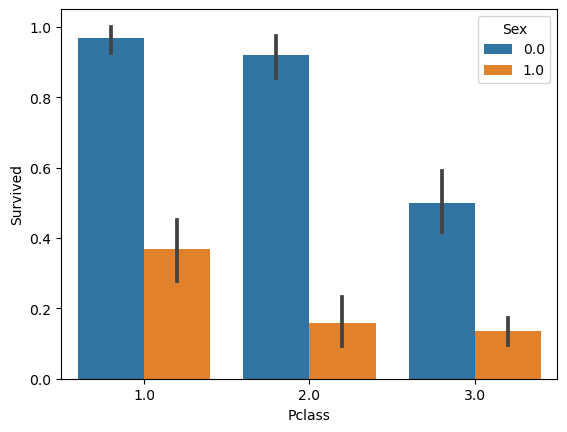

In [18]:
sns.barplot(data=df1,x='Pclass',y='Survived',hue='Sex')

- from above graph we can say that almost 90 % women from 1st class and second class survived crash 

<AxesSubplot: xlabel='Name', ylabel='Survived'>

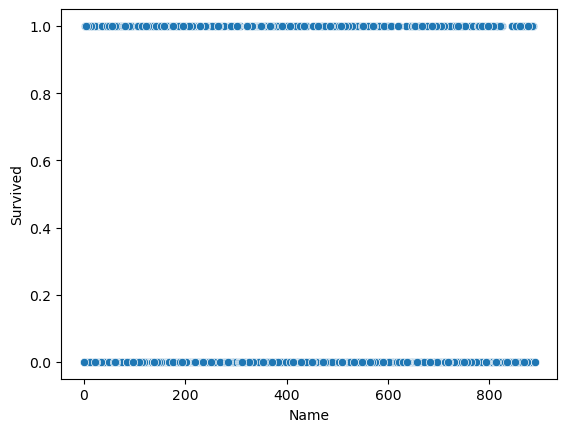

In [19]:
sns.scatterplot(data=df1,x='Name',y='Survived')

- we can observe that data is equally distributed

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

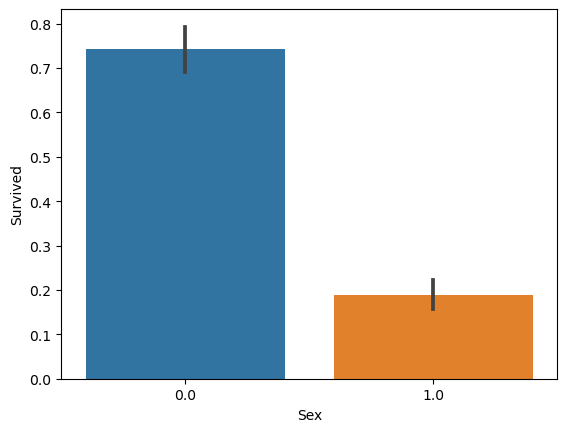

In [20]:
sns.barplot(data=df1,x='Sex',y='Survived')

- almost 75% women survived crash and only 20% men survived

<AxesSubplot: xlabel='Age', ylabel='Survived'>

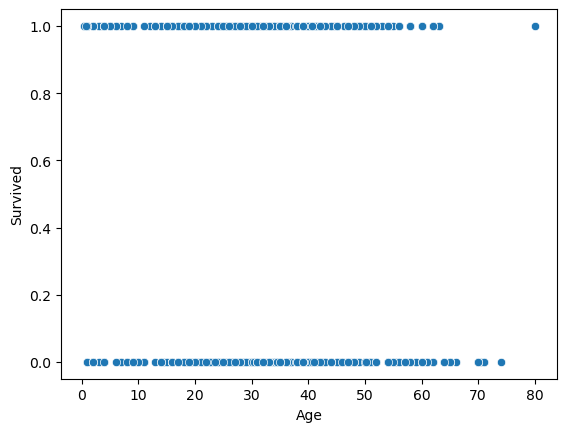

In [21]:
sns.scatterplot(data=df1,x='Age',y='Survived')

- we can observe that data is equally distributed

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

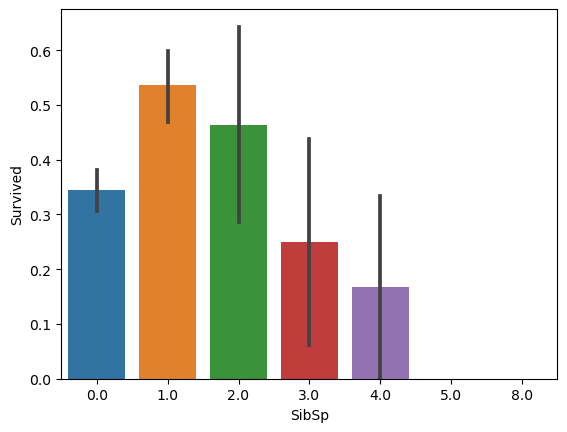

In [22]:
sns.barplot(data=df1,x='SibSp',y='Survived')

- none of the passengers having 5 or more number of siblings or spouse survived

<AxesSubplot: xlabel='Parch', ylabel='Survived'>

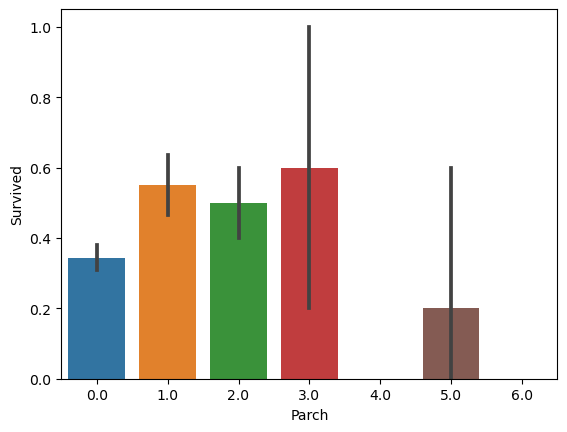

In [23]:
sns.barplot(data=df1,x='Parch',y='Survived')

- none of the passengers having 4 or 6  parents or children count survived 

<AxesSubplot: xlabel='Ticket', ylabel='Survived'>

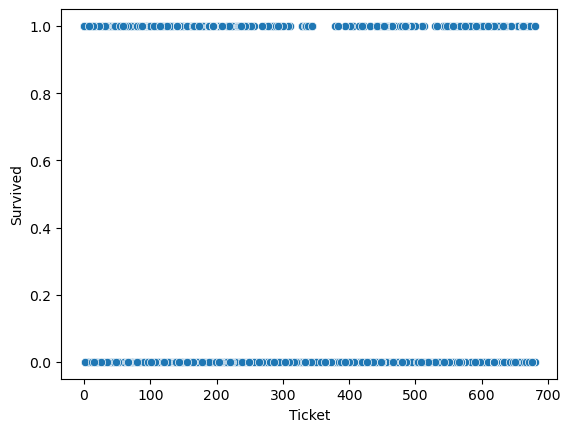

In [24]:
sns.scatterplot(data=df1,x='Ticket',y='Survived')

- we can observe that data is equally distributed

<AxesSubplot: xlabel='Fare', ylabel='Survived'>

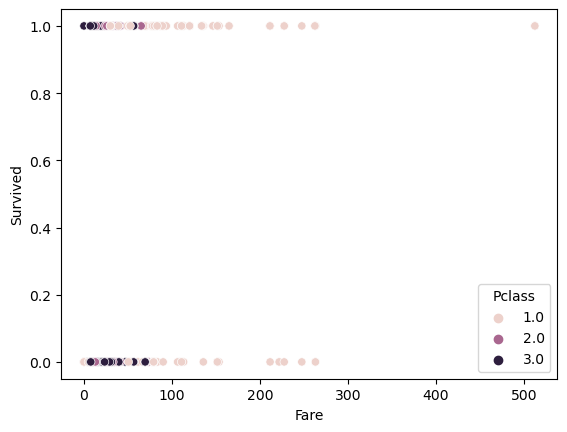

In [25]:
sns.scatterplot(data=df1,x='Fare',y='Survived',hue='Pclass')

- we can observe that 1st class passengers paid more fee as compared to others

# Outlier Treatment

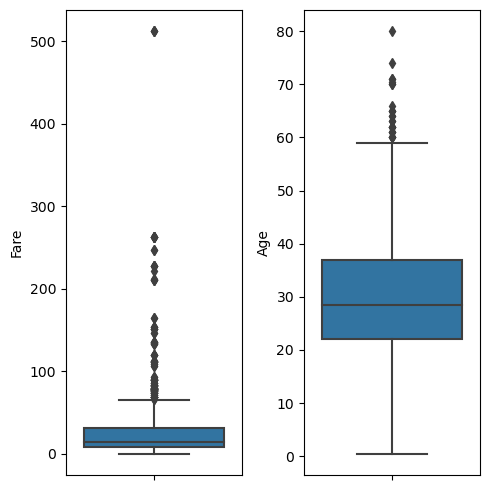

In [26]:
#checking outliers in continous data
plt.figure(figsize=(5,5))
sns.boxplot(y=df1['Fare'],ax=plt.subplot(1,2,1))
sns.boxplot(y=df1['Age'],ax=plt.subplot(1,2,2))
plt.tight_layout()

- we can observe that there are many uotliers present which are needed to be removed


In [27]:
# using z score method
from scipy.stats import zscore
z = np.abs(zscore(df1[['Age','Fare']]))
z[z>3].count()

Age      5
Fare    20
dtype: int64

- we can observe that there are 20 outliers present in fare column and 5 in age column

In [28]:
x=df1
x[['Age','Fare']]=df1[['Age','Fare']][z<3]

x=x.dropna()
x.shape

(866, 10)

In [29]:
df1.shape

(891, 10)

In [30]:
y=x['Survived']
x=x.drop(columns='Survived')

In [31]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,2.0
1,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,0.0
2,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,2.0
3,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,2.0
4,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,2.0,548.0,1.0,27.0,0.0,0.0,101.0,13.0000,2.0
887,1.0,303.0,0.0,19.0,0.0,0.0,14.0,30.0000,2.0
888,3.0,413.0,0.0,23.6,1.0,2.0,675.0,23.4500,2.0
889,1.0,81.0,1.0,26.0,0.0,0.0,8.0,30.0000,0.0


In [32]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 866, dtype: float64

### Skeweness

In [33]:
x[['Age','Fare']].skew()

Age     0.272664
Fare    2.250123
dtype: float64

In [34]:
# removing skeweness of fare using cube root method
x['Fare']= np.cbrt(x['Fare'])
x[['Age','Fare']].skew()

Age     0.272664
Fare    0.618089
dtype: float64

- Now skeweness is significantly reduced and we can move on

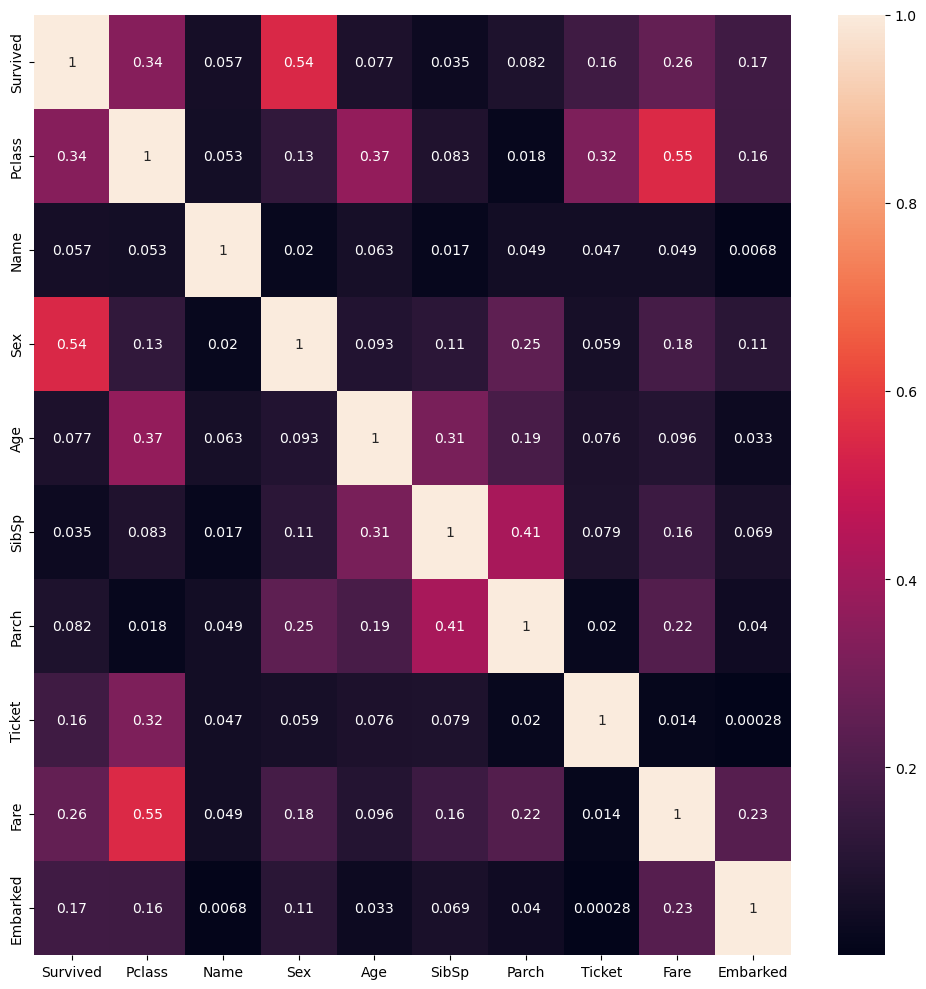

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True)
plt.tight_layout()

- We can observe that there is no multicolinearity
- since there are less number of colums we can continue with standerdization

### Standerd Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.80369745, -1.3270007 ,  0.731752  , ...,  0.9353586 ,
        -0.80985748,  0.57251054],
       [-1.6384148 , -1.0066569 , -1.36658321, ...,  1.30139593,
         1.59421771, -2.004382  ],
       [ 0.80369745, -0.36987592, -1.36658321, ...,  1.66743325,
        -0.74647164,  0.57251054],
       ...,
       [ 0.80369745, -0.13547802, -1.36658321, ...,  1.69751851,
         0.19799089,  0.57251054],
       [-1.6384148 , -1.43247976,  0.731752  , ..., -1.64695953,
         0.46433281, -2.004382  ],
       [ 0.80369745, -0.88945795,  0.731752  , ...,  0.64954863,
        -0.76254814, -0.71593573]])

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [38]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [39]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
48,552.0,80.431433,79.723502
18,195.0,80.277350,80.184332
89,909.0,80.277350,80.184332
37,445.0,80.123267,79.723502
62,687.0,80.123267,80.184332
...,...,...,...
71,772.0,78.736518,78.801843
65,713.0,78.736518,79.262673
75,800.0,78.736518,78.801843
28,290.0,78.582435,79.262673


- we can observe that Random state 195 we get max accuracy wit minimum difference

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=195)

In [41]:
y_train.value_counts()

0.0    405
1.0    244
Name: Survived, dtype: int64

### Resampling training data

In [42]:
# using smote
from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.80) # increasing data upto 80% 
x_train,y_train = ov_sm.fit_resample(x_train,y_train)
y_train.value_counts()

0.0    405
1.0    324
Name: Survived, dtype: int64

### Training the model

Logistic regression 

In [43]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.7972350230414746


In [44]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  77.82909930715935 
Accuracy score 79.72350230414746


cv =  3 
Cross Validation score =  78.75336409073434 
Accuracy score 79.72350230414746


cv =  4 
Cross Validation score =  79.21413637139445 
Accuracy score 79.72350230414746


cv =  5 
Cross Validation score =  78.75224237592187 
Accuracy score 79.72350230414746


cv =  6 
Cross Validation score =  78.6374521072797 
Accuracy score 79.72350230414746


cv =  7 
Cross Validation score =  78.51991307931512 
Accuracy score 79.72350230414746


cv =  8 
Cross Validation score =  78.63893136255523 
Accuracy score 79.72350230414746


cv =  9 
Cross Validation score =  78.29085528827798 
Accuracy score 79.72350230414746



- cv = 4 is giving best result

In [45]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [46]:
lr_s_cv_score=cross_val_score(lr,x,y,cv=4)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  79.21413637139445 
Accuracy score =  79.72350230414746 
Difference =  0.5093659327530133


##### Random  forest classifer

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

82.48847926267281


In [48]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x,y,cv=4)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  83.02984724355693 
Accuracy score =  82.48847926267281 
Difference =  0.5413679808841181


##### AdaBoostClassifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

78.80184331797236


In [50]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x,y,cv=4)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  81.52468424645843 
Accuracy score =  78.80184331797236 
Difference =  2.722840928486079


##### GradientBoostingClassifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_test_pred=gbc.predict(x_test)
gbc_ac_score = accuracy_score(y_test,gbc_test_pred)*100
print (gbc_ac_score)

82.94930875576037


In [52]:
# cross validation
gbc_s_cv_score=cross_val_score(gbc,x,y,cv=4)
gbc_s_cv_score_mean = gbc_s_cv_score.mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score,'\nDifference = ',(gbc_s_cv_score_mean*100)-gbc_ac_score)
ms_df = ms_df.append({'Model':'Gradient boosting classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score,2),'Difference':round(np.abs(gbc_ac_score-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  82.10232121522444 
Accuracy score =  82.94930875576037 
Difference =  -0.8469875405359346


##### XGBClassifier

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

79.26267281105991


In [54]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x,y,cv=4)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  81.18386243386243 
Accuracy score =  79.26267281105991 
Difference =  1.9211896228025154


##### SVC

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_test_pred=svc.predict(x_test)
svc_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (svc_ac_score)

62.21198156682027


In [56]:
# cross validation
svc_s_cv_score=cross_val_score(svc,x,y,cv=4)
svc_s_cv_score_mean = svc_s_cv_score.mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score,'\nDifference = ',(svc_s_cv_score_mean*100)-svc_ac_score)
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score,2),'Difference':round(np.abs(svc_ac_score-(svc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  65.24417562724014 
Accuracy score =  62.21198156682027 
Difference =  3.0321940604198687


##### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=svc.predict(x_test)
knn_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (knn_ac_score)

62.21198156682027


In [58]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x,y,cv=4)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  64.31878306878306 
Accuracy score =  62.21198156682027 
Difference =  2.106801501962792


In [59]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
3,Gradient boosting classifier,82.10,82.95,0.85
1,Random forest classifier,83.03,82.49,0.54
0,Logistic regression,79.21,79.72,0.51
4,XGBOOST classifier,81.18,79.26,1.92
2,Adaboost classifier,81.52,78.80,2.72
5,SVC,65.24,62.21,3.03
6,KNN Classifier,64.32,62.21,2.11


- we can observe that Random forest classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50,75,100,125,150, 200, 300], 
    'max_depth': [2,3,5,7, 10, 15], 
    'min_samples_split': [1,2,3, 5,7, 10], 
    'criterion' : ["gini", "entropy"]
    
}

In [64]:
# Perform randomized search
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5)
random_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 7, 'max_depth': 15, 'criterion': 'gini'}
Best score: 0.8478223901747757


In [66]:
final_model = RandomForestClassifier(min_samples_split=7,max_depth= 15,n_estimators= 200,criterion='gini')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

83.41013824884793


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       134
         1.0       0.81      0.73      0.77        83

    accuracy                           0.83       217
   macro avg       0.83      0.82      0.82       217
weighted avg       0.83      0.83      0.83       217



In [68]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [69]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.10447761 1.        ] 
tpr =  [0.         0.73493976 1.        ] 
threshold =  [2. 1. 0.]


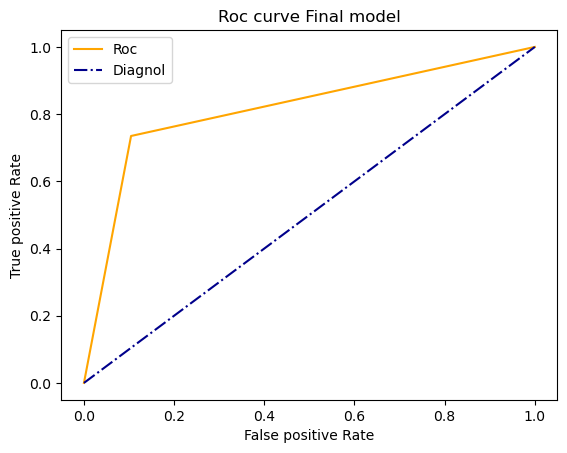

In [70]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

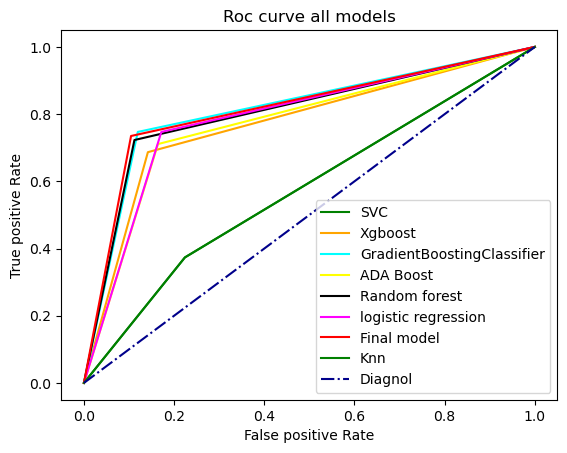

In [71]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc_test_pred)
fpr3,tpr3,threshold = roc_curve(y_test,xgb_test_pred)
fpr4,tpr4,threshold = roc_curve(y_test,gbc_test_pred)
fpr5,tpr5,threshold = roc_curve(y_test,abc_test_pred)
fpr6,tpr6,threshold = roc_curve(y_test,rfc_test_pred)
fpr7,tpr7,threshold = roc_curve(y_test,lr_test_pred)
fpr8,tpr8,threshold = roc_curve(y_test,knn_test_pred)


plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='magenta',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot(fpr8,tpr8,color='green',label = 'Knn')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

#### Saving Model

In [72]:
import pickle
with open('final_Random_forest_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

##### 1. For this problem eventhough from roc curve graph we can see that our Final model(Red colored) has more area under the curve therefore it is the best  model

# Testing with arbitrary passenger

In [73]:
a=df.loc[889]

In [74]:
a

Survived     1.0
Pclass       1.0
Name        81.0
Sex          1.0
Age         26.0
SibSp        0.0
Parch        0.0
Ticket       8.0
Fare        30.0
Embarked     0.0
Name: 889, dtype: float64

In [75]:
a.tolist()

[1.0, 1.0, 81.0, 1.0, 26.0, 0.0, 0.0, 8.0, 30.0, 0.0]

In [76]:
ab_value = np.array([[1.0, 81.0, 1.0, 26.0, 0.0, 0.0, 8.0, 30.0, 0.0]])
scaler.transform(ab_value)

array([[-1.6384148 , -1.43247976,  0.731752  , -0.26848781, -0.47203191,
        -0.4641273 , -1.64695953, 29.70709899, -2.004382  ]])

In [77]:
final_model.predict(ab_value)

array([1.])

- our model predicted this correctly